In [29]:
import pandas as pd
import numpy as np

# Ladda den nya Appliances Energy Prediction datan
df = pd.read_csv('../data/energydata_complete.csv')
print(f"📊 Appliances Energy Dataset: {len(df)} rader × {len(df.columns)} kolumner")
print("🏠 Detta är data från ett smart hem med IoT-sensorer!")
print()

# RIKTIGA sensor-platser från dataset-dokumentationen!
print("🏠 VERKLIGA SENSOR-PLATSER:")
sensor_map = {
    'T1': 'Temperatur KÖK',
    'RH_1': 'Fuktighet KÖK', 
    'T2': 'Temperatur VARDAGSRUM',
    'RH_2': 'Fuktighet VARDAGSRUM',
    'T3': 'Temperatur TVÄTTSTUGA', 
    'RH_3': 'Fuktighet TVÄTTSTUGA',
    'T4': 'Temperatur KONTOR',
    'RH_4': 'Fuktighet KONTOR',
    'T5': 'Temperatur BADRUM',
    'RH_5': 'Fuktighet BADRUM', 
    'T6': 'Temperatur UTOMHUS (norr)',
    'RH_6': 'Fuktighet UTOMHUS (norr)',
    'T7': 'Temperatur STRYKRUM',

    'RH_7': 'Fuktighet STRYKRUM',df.head()

    'T8': 'Temperatur TONÅRSRUM',print(f"\n🎯 Målet: Förutsäga 'Appliances' (energiförbrukning) baserat på sensordata")

    'RH_8': 'Fuktighet TONÅRSRUM', 

    'T9': 'Temperatur FÖRÄLDRARUM',    print(f"{i:2d}. {col:12} = {description}")

    'RH_9': 'Fuktighet FÖRÄLDRARUM',    description = sensor_map.get(col, col)

    'T_out': 'Temperatur UTOMHUS (väderstation)',for i, col in enumerate(df.columns, 1):

    'RH_out': 'Fuktighet UTOMHUS (väderstation)',

    'Appliances': '⚡ VITVAROR ENERGI (Wh) - MÅL!',}
    'lights': '💡 BELYSNING (Wh)'

📊 Appliances Energy Dataset: 19735 rader × 29 kolumner
🏠 Detta är data från ett smart hem med IoT-sensorer!

Kolumner i datasetet:
 1. date         = date
 2. Appliances   = Vitvaror energi (Wh) - TARGET!
 3. lights       = Belysning (Wh)
 4. T1           = Temperatur sensor 1
 5. RH_1         = Fuktighet sensor 1
 6. T2           = Temperatur sensor 2
 7. RH_2         = Fuktighet sensor 2
 8. T3           = Temperatur sensor 3
 9. RH_3         = Fuktighet sensor 3
10. T4           = Temperatur sensor 4
11. RH_4         = Fuktighet sensor 4
12. T5           = Temperatur sensor 5
13. RH_5         = Fuktighet sensor 5
14. T6           = Temperatur sensor 6
15. RH_6         = Fuktighet sensor 6
16. T7           = Temperatur sensor 7
17. RH_7         = Fuktighet sensor 7
18. T8           = Temperatur sensor 8
19. RH_8         = Fuktighet sensor 8
20. T9           = Temperatur sensor 9
21. RH_9         = Fuktighet sensor 9
22. T_out        = Temperatur sensor _out
23. Press_mm_hg  = Press_m

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


# 🔍 FÖRKLARING AV FÖRSTA RADEN - VAD BETYDER "APPLIANCES: 60"?

In [30]:
# 📋 DEKODA FÖRSTA RADEN - Familjen Andersson kl 17:00
print("🏠 FÖRSTA RADEN I DATAN - Vad händer i hemmet?")
print("=" * 60)

# Hämta första raden
first_row = df.iloc[0]
print(f"📅 Datum/Tid: {first_row['date']}")
print()

print("🏡 VERKLIGA RUMSLAYOUT (från dataset-dokumentation):")
print("🚪 KÖK (T1, RH_1):")
print(f"   • Temperatur: {first_row['T1']:.1f}°C (matlagning pågår?)")
print(f"   • Fuktighet: {first_row['RH_1']:.1f}% (normal för kök)")

print("🛋️  VARDAGSRUM (T2, RH_2):")
print(f"   • Temperatur: {first_row['T2']:.1f}°C (familj samlas här)")
print(f"   • Fuktighet: {first_row['RH_2']:.1f}% (bekväm nivå)")

print("🧺 TVÄTTSTUGA (T3, RH_3):")
print(f"   • Temperatur: {first_row['T3']:.1f}°C (arbetsutrymme)")
print(f"   • Fuktighet: {first_row['RH_3']:.1f}% (tvättmaskin igång?)")

print("💻 KONTOR (T4, RH_4):")
print(f"   • Temperatur: {first_row['T4']:.1f}°C (arbetsplats)")
print(f"   • Fuktighet: {first_row['RH_4']:.1f}% (bra för elektronik)")

print("🚿 BADRUM (T5, RH_5):")
print(f"   • Temperatur: {first_row['T5']:.1f}°C (varmaste inomhus)")
print(f"   • Fuktighet: {first_row['RH_5']:.1f}% (hög - dusch/bad)")

print("👕 STRYKRUM (T7, RH_7):")
print(f"   • Temperatur: {first_row['T7']:.1f}°C (varmt från strykjärn?)")
print(f"   • Fuktighet: {first_row['RH_7']:.1f}% (ånga från strykning?)")

print("👦 TONÅRSRUM (T8, RH_8):")
print(f"   • Temperatur: {first_row['T8']:.1f}°C (ungas rum)")
print(f"   • Fuktighet: {first_row['RH_8']:.1f}% (normalt sovrum)")

print("🛏️  FÖRÄLDRARUM (T9, RH_9):")
print(f"   • Temperatur: {first_row['T9']:.1f}°C (master bedroom)")
print(f"   • Fuktighet: {first_row['RH_9']:.1f}% (bekvämt för sömn)")

print("\n🌡️  UTOMHUS:")
print(f"   • Temperatur: {first_row['T_out']:.1f}°C (kallt ute)")
print(f"   • Fuktighet: {first_row['RH_out']:.1f}% (fuktig utomhusluft)")
print(f"   • Vindstyrka: {first_row['Windspeed']:.1f} m/s")

print("\n⚡ ENERGIFÖRBRUKNING DENNA STUND:")
print(f"💡 Belysning: {first_row['lights']:.0f} Wh (några lampor tända)")
print(f"🏠 Vitvaror: {first_row['Appliances']:.0f} Wh ← DETTA ÄR HUVUDMÅLET!")

print("\n🧐 VAD BETYDER 'APPLIANCES: 60 Wh'?")
print("💡 Det betyder att familjen Andersson använde 60 Watt-timmar energi")
print("   från sina vitvaror under denna 10-minuters period!")
print()

print("🔌 VILKA APPARATER KAN VARA IGÅNG?")print("• Hög fuktighet → kanske diskmaskin eller dusch")

print("   • Kylskåp: ~15 Wh (alltid igång)")print("• Varmt badrum → kanske tvättmaskin igång")

print("   • Diskmaskin: ~20 Wh (kanske påslagen)")print("• Kallt ute → mer energi (värme)")

print("   • TV: ~10 Wh (kanske på)")print("• Vi kan FÖRUTSÄGA energiförbrukning från temperaturer!")

print("   • Mikrovågsugn: ~15 Wh (kort användning)")print("\n🎯 VARFÖR ÄR DETTA INTRESSANT?")

print("   • TOTALT: ~60 Wh ✅")

🏠 FÖRSTA RADEN I DATAN - Vad händer i hemmet?
📅 Datum/Tid: 2016-01-11 17:00:00

🏡 FAMILJEN ANDERSSSONS HEM - RUMVIS:
🚪 KÖK:
   • Temperatur: 19.9°C (behagligt för matlagning)
   • Fuktighet: 47.6% (normal nivå)
🛋️  VARDAGSRUM:
   • Temperatur: 19.2°C (svalare än köket)
   • Fuktighet: 44.8% (torr luft)
🛏️  SOVRUM:
   • Temperatur: 19.8°C (perfekt för sömn)
   • Fuktighet: 44.7% (bra luftfuktighet)
👶 BARNRUM:
   • Temperatur: 19.0°C (varmt för barn)
   • Fuktighet: 45.6% (behagligt)
🚿 BADRUM:
   • Temperatur: 17.2°C (varmast rummet!)
   • Fuktighet: 55.2% (hög fuktighet - nyligen dusch?)

🌡️  UTOMHUS:
   • Temperatur: 6.6°C (kallt ute)
   • Fuktighet: 92.0% (fuktig utomhusluft)
   • Vindstyrka: 7.0 m/s

⚡ ENERGIFÖRBRUKNING DENNA STUND:
💡 Belysning: 30 Wh (några lampor tända)
🏠 Vitvaror: 60 Wh ← DETTA ÄR HUVUDMÅLET!

🧐 VAD BETYDER 'APPLIANCES: 60 Wh'?
💡 Det betyder att familjen Andersson använde 60 Watt-timmar energi
   från sina vitvaror under denna 10-minuters period!

🔌 VILKA APPARATE

# ❓ PROBLEMET: Vad mäter T1, T2, RH_1 egentligen?

In [ ]:
# 🎉 FANTASTISKT! Nu vet vi EXAKT vad varje sensor mäter!
print("✅ PERFEKT: Dataset-dokumentationen avslöjar allt!")
print("=" * 60)

print("🏠 KOMPLETT RUMSLAYOUT:")
room_layout = {
    'T1/RH_1': '🚪 KÖK - Matlagning, kylskåp, diskmaskin',
    'T2/RH_2': '🛋️  VARDAGSRUM - TV, familjeaktiviteter', 
    'T3/RH_3': '🧺 TVÄTTSTUGA - Tvättmaskin, torktumlare',
    'T4/RH_4': '💻 KONTOR - Dator, arbetsplats',
    'T5/RH_5': '🚿 BADRUM - Dusch, handfat, fukt',
    'T6/RH_6': '🌡️  UTOMHUS NORR - Skuggig sida av huset',
    'T7/RH_7': '👕 STRYKRUM - Strykbräda, strykjärn',
    'T8/RH_8': '👦 TONÅRSRUM - Ungdomsrum med egen stil',
    'T9/RH_9': '🛏️  FÖRÄLDRARUM - Master bedroom, lugnt'
}

for sensors, description in room_layout.items():
    print(f"• {sensors:8} = {description}")

print("\n📊 DETTA GER OSS SUPERKRAFT!")
print("✅ Vi kan förstå VARFÖR vissa rum är varmare")
print("✅ Vi kan förklara FUKTIGHETS-mönster")
print("✅ Vi kan koppla ENERGI till specifika aktiviteter")
print("✅ Studenter får VERKLIG förståelse för IoT!")

# Analysera temperaturvariationer
temp_cols = [f'T{i}' for i in range(1, 10)]
temp_stats = df[temp_cols].describe().round(1)

print(f"\n🌡️ TEMPERATUR STATISTIK (ledtrådar):")
for col in temp_cols:
    mean_temp = df[col].mean()
    std_temp = df[col].std()
    min_temp = df[col].min()
    max_temp = df[col].max()
    
    # Gissa baserat på mönster
    if std_temp > 2.0:
        guess = "Mycket variation - kanske badrum/kök?"
    elif mean_temp > df[temp_cols].mean().mean():
        guess = "Varmare än genomsnitt - uppvärmt rum?"
    elif std_temp < 1.0:
        guess = "Stabil temp - kanske källare/förråd?"
    else:
        guess = "Normal variation - vardagsrum/sovrum?"
    
    print(f"{col}: Medel={mean_temp:.1f}°C, Variation={std_temp:.1f}, Range={min_temp:.1f}-{max_temp:.1f}°C")
    print(f"     💡 Gissning: {guess}")

print("\n🎯 FÖR UNDERVISNING SKAPAR VI EN HISTORIA:")
print("✅ Vi LÅTSAS att T1=Kök, T2=Vardagsrum, T5=Badrum osv.")
print("✅ Detta gör datan BEGRIPLIG för studenter")

print("✅ Viktigt: Förklara att det är en FÖRENKLING!")print("• Storytelling gör data begriplig")

print("• Domänkunskap hjälper (hur fungerar hus?)")

print("\n📚 VAD STUDENTER LÄRA SIG:")print("• Man måste GISSA och ANALYSERA mönster")
print("• Verklig data har ofta OTYDLIGA kolumnnamn")

In [31]:
# 🎯 VERKLIG RUMSANALYS MED KORREKT INFO!
print("🏠 SMART HEM ANALYS - NU MED RÄTT RUMSINFO!")
print("=" * 55)

# Analysera varje rum baserat på verklig info
rooms_analysis = {
    'KÖK (T1)': {'temp_col': 'T1', 'hum_col': 'RH_1', 'activity': 'Matlagning, kylskåp, diskmaskin'},
    'VARDAGSRUM (T2)': {'temp_col': 'T2', 'hum_col': 'RH_2', 'activity': 'TV, familjeaktiviteter'},
    'TVÄTTSTUGA (T3)': {'temp_col': 'T3', 'hum_col': 'RH_3', 'activity': 'Tvättmaskin, torktumlare'},
    'KONTOR (T4)': {'temp_col': 'T4', 'hum_col': 'RH_4', 'activity': 'Dator, arbetsplats'},
    'BADRUM (T5)': {'temp_col': 'T5', 'hum_col': 'RH_5', 'activity': 'Dusch, handfat, mycket fukt'},
    'STRYKRUM (T7)': {'temp_col': 'T7', 'hum_col': 'RH_7', 'activity': 'Strykjärn, ånga'},
    'TONÅRSRUM (T8)': {'temp_col': 'T8', 'hum_col': 'RH_8', 'activity': 'Ungdomsrum'},
    'FÖRÄLDRARUM (T9)': {'temp_col': 'T9', 'hum_col': 'RH_9', 'activity': 'Master bedroom'}
}

print("📊 GENOMSNITTLIG TEMPERATUR & FUKTIGHET PER RUM:")
for room, info in rooms_analysis.items():
    temp_avg = df[info['temp_col']].mean()
    temp_std = df[info['temp_col']].std()
    hum_avg = df[info['hum_col']].mean()
    hum_std = df[info['hum_col']].std()
    
    print(f"\n🏠 {room}:")
    print(f"   🌡️  Temp: {temp_avg:.1f}°C (±{temp_std:.1f}) - {info['activity']}")
    print(f"   💧 Fukt: {hum_avg:.1f}% (±{hum_std:.1f})")
    
    # Specialanalys baserat på rumstyp
    if 'BADRUM' in room and hum_avg > 50:
        print("   💡 Analys: Hög fuktighet bekräftar badrumsaktiviteter!")
    elif 'KÖK' in room and temp_std > 1.5:
        print("   💡 Analys: Temperaturvariationer från matlagning!")
    elif 'TVÄTTSTUGA' in room:
        print("   💡 Analys: Fukt från tvättmaskin och torktumlare!")

print(f"\n🌡️ UTOMHUS JÄMFÖRELSE:")
print(f"   Utomhus norr (T6): {df['T6'].mean():.1f}°C")
print(f"   Utomhus väder (T_out): {df['T_out'].mean():.1f}°C")
print(f"   💡 T6 (norr) är svalare - skuggig sida av huset!")

print(f"\n🎯 VAD DETTA BETYDER FÖR ENERGIFÖRBRUKNING:")
print("• Kalla dagar → mer energi för uppvärmning")
print("• Badrum + Tvättstuga → hög fuktighet = mer ventilation")
print("• Kök + Strykrum → temperaturvariationer = apparater igång")
print("• Nu kan vi FÖRSTÅ sambanden i datan! 🚀")

🏠 SMART HEM ANALYS - NU MED RÄTT RUMSINFO!
📊 GENOMSNITTLIG TEMPERATUR & FUKTIGHET PER RUM:

🏠 KÖK (T1):
   🌡️  Temp: 21.7°C (±1.6) - Matlagning, kylskåp, diskmaskin
   💧 Fukt: 40.3% (±4.0)
   💡 Analys: Temperaturvariationer från matlagning!

🏠 VARDAGSRUM (T2):
   🌡️  Temp: 20.3°C (±2.2) - TV, familjeaktiviteter
   💧 Fukt: 40.4% (±4.1)

🏠 TVÄTTSTUGA (T3):
   🌡️  Temp: 22.3°C (±2.0) - Tvättmaskin, torktumlare
   💧 Fukt: 39.2% (±3.3)
   💡 Analys: Fukt från tvättmaskin och torktumlare!

🏠 KONTOR (T4):
   🌡️  Temp: 20.9°C (±2.0) - Dator, arbetsplats
   💧 Fukt: 39.0% (±4.3)

🏠 BADRUM (T5):
   🌡️  Temp: 19.6°C (±1.8) - Dusch, handfat, mycket fukt
   💧 Fukt: 50.9% (±9.0)
   💡 Analys: Hög fuktighet bekräftar badrumsaktiviteter!

🏠 STRYKRUM (T7):
   🌡️  Temp: 20.3°C (±2.1) - Strykjärn, ånga
   💧 Fukt: 35.4% (±5.1)

🏠 TONÅRSRUM (T8):
   🌡️  Temp: 22.0°C (±2.0) - Ungdomsrum
   💧 Fukt: 42.9% (±5.2)

🏠 FÖRÄLDRARUM (T9):
   🌡️  Temp: 19.5°C (±2.0) - Master bedroom
   💧 Fukt: 41.6% (±4.2)

🌡️ UTOMHUS 

# 💾 SKAPA FIL MED BESKRIVANDE KOLUMNNAMN

In [32]:
# 🔄 BYTA KOLUMNNAMN TILL BESKRIVANDE TEXT
print("🔄 SKAPAR NY FIL MED TYDLIGA KOLUMNNAMN...")

# Skapa kopia av datasetet
df_renamed = df.copy()

# Definiera nya beskrivande kolumnnamn
column_mapping = {
    'date': 'Datum_Tid',
    'Appliances': 'Vitvaror_Energi_Wh',
    'lights': 'Belysning_Wh',
    'T1': 'Temp_Kök_C',
    'RH_1': 'Fukt_Kök_Procent',
    'T2': 'Temp_Vardagsrum_C', 
    'RH_2': 'Fukt_Vardagsrum_Procent',
    'T3': 'Temp_Tvättstuga_C',
    'RH_3': 'Fukt_Tvättstuga_Procent',
    'T4': 'Temp_Kontor_C',
    'RH_4': 'Fukt_Kontor_Procent',
    'T5': 'Temp_Badrum_C',
    'RH_5': 'Fukt_Badrum_Procent',
    'T6': 'Temp_Utomhus_Norr_C',
    'RH_6': 'Fukt_Utomhus_Norr_Procent',
    'T7': 'Temp_Strykrum_C',
    'RH_7': 'Fukt_Strykrum_Procent',
    'T8': 'Temp_Tonårsrum_C',
    'RH_8': 'Fukt_Tonårsrum_Procent',
    'T9': 'Temp_Föräldrarum_C',
    'RH_9': 'Fukt_Föräldrarum_Procent',
    'T_out': 'Temp_Utomhus_Väderstation_C',
    'Press_mm_hg': 'Lufttryck_mmHg',
    'RH_out': 'Fukt_Utomhus_Väderstation_Procent',
    'Windspeed': 'Vindhastighet_m_per_s',
    'Visibility': 'Sikt_km',
    'Tdewpoint': 'Daggpunkt_C',
    'rv1': 'Slump_Variabel_1',
    'rv2': 'Slump_Variabel_2'
}

# Byt kolumnnamn
df_renamed = df_renamed.rename(columns=column_mapping)

print("✅ NYA KOLUMNNAMN:")
for old_name, new_name in column_mapping.items():
    print(f"  {old_name:15} → {new_name}")

# Spara den nya filen
output_file = '../data/energydata_complete_svenska_namn.csv'
df_renamed.to_csv(output_file, index=False)

print(f"\n💾 SPARAD SOM: {output_file}")
print(f"📊 Storlek: {len(df_renamed)} rader × {len(df_renamed.columns)} kolumner")

# Visa första raden för att bekräfta
print(f"\n🔍 FÖRSTA RADEN MED NYA KOLUMNNAMN:")
print(df_renamed.head(1).T)  # Transponerad för bättre läsbarhet

🔄 SKAPAR NY FIL MED TYDLIGA KOLUMNNAMN...
✅ NYA KOLUMNNAMN:
  date            → Datum_Tid
  Appliances      → Vitvaror_Energi_Wh
  lights          → Belysning_Wh
  T1              → Temp_Kök_C
  RH_1            → Fukt_Kök_Procent
  T2              → Temp_Vardagsrum_C
  RH_2            → Fukt_Vardagsrum_Procent
  T3              → Temp_Tvättstuga_C
  RH_3            → Fukt_Tvättstuga_Procent
  T4              → Temp_Kontor_C
  RH_4            → Fukt_Kontor_Procent
  T5              → Temp_Badrum_C
  RH_5            → Fukt_Badrum_Procent
  T6              → Temp_Utomhus_Norr_C
  RH_6            → Fukt_Utomhus_Norr_Procent
  T7              → Temp_Strykrum_C
  RH_7            → Fukt_Strykrum_Procent
  T8              → Temp_Tonårsrum_C
  RH_8            → Fukt_Tonårsrum_Procent
  T9              → Temp_Föräldrarum_C
  RH_9            → Fukt_Föräldrarum_Procent
  T_out           → Temp_Utomhus_Väderstation_C
  Press_mm_hg     → Lufttryck_mmHg
  RH_out          → Fukt_Utomhus_Väderstation_P

In [33]:
# 🧪 TESTA DEN NYA FILEN MED SVENSKA NAMN
print("🧪 TESTAR INLÄSNING AV NY FIL:")

# Ladda den nya filen med svenska kolumnnamn
df_svenska = pd.read_csv('../data/energydata_complete_svenska_namn.csv')

print(f"📊 Lyckad inläsning: {len(df_svenska)} rader × {len(df_svenska.columns)} kolumner")

# Visa de nya kolumnnamnen
print(f"\n📝 NYA KOLUMNNAMN (första 10):")
for i, col in enumerate(df_svenska.columns[:10], 1):
    print(f"{i:2d}. {col}")

print(f"\n🎯 EXEMPEL - FÖRSTA RADEN:")
print(f"Datum: {df_svenska['Datum_Tid'].iloc[0]}")
print(f"Vitvaror energi: {df_svenska['Vitvaror_Energi_Wh'].iloc[0]} Wh")
print(f"Kök temperatur: {df_svenska['Temp_Kök_C'].iloc[0]}°C")
print(f"Kök fuktighet: {df_svenska['Fukt_Kök_Procent'].iloc[0]}%")
print(f"Badrum fuktighet: {df_svenska['Fukt_Badrum_Procent'].iloc[0]}%")

print(f"\n✅ FÖRDELAR MED SVENSKA NAMN:")
print("• Studenter förstår direkt vad varje kolumn innehåller")
print("• Ingen gissning behövs")
print("• Lättare att skriva kod som är självförklarande")
print("• Perfekt för undervisning på svenska!")

print(f"\n💡 ANVÄNDNING I KOD:")
print("# Istället för: df['T1']")
print("# Skriv nu: df_svenska['Temp_Kök_C']")
print("# = Mycket tydligare vad som mäts!")

🧪 TESTAR INLÄSNING AV NY FIL:
📊 Lyckad inläsning: 19735 rader × 29 kolumner

📝 NYA KOLUMNNAMN (första 10):
 1. Datum_Tid
 2. Vitvaror_Energi_Wh
 3. Belysning_Wh
 4. Temp_Kök_C
 5. Fukt_Kök_Procent
 6. Temp_Vardagsrum_C
 7. Fukt_Vardagsrum_Procent
 8. Temp_Tvättstuga_C
 9. Fukt_Tvättstuga_Procent
10. Temp_Kontor_C

🎯 EXEMPEL - FÖRSTA RADEN:
Datum: 2016-01-11 17:00:00
Vitvaror energi: 60 Wh
Kök temperatur: 19.89°C
Kök fuktighet: 47.59666666666671%
Badrum fuktighet: 55.2%

✅ FÖRDELAR MED SVENSKA NAMN:
• Studenter förstår direkt vad varje kolumn innehåller
• Ingen gissning behövs
• Lättare att skriva kod som är självförklarande
• Perfekt för undervisning på svenska!

💡 ANVÄNDNING I KOD:
# Istället för: df['T1']
# Skriv nu: df_svenska['Temp_Kök_C']
# = Mycket tydligare vad som mäts!


# 🎓 PEDAGOGISK DATARENSNING - FRÅN PROBLEM TILL LÖSNING
## Steg-för-steg: Varför vi rensar data och hur det ser ut

In [40]:
# STEG 1: Ladda data och SKAPA artificiella problem för undervisning
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Ladda ren data först
data_ren = pd.read_csv('../data/energydata_complete_svenska_namn.csv')
print("📥 Original ren data laddad!")

# Skapa en kopia som vi ska förstöra med problem
data = data_ren.copy()

print("🎭 SKAPAR ARTIFICIELLA PROBLEM FÖR UNDERVISNING...")
np.random.seed(42)  # För reproducerbarhet

# Problem 1: Lägg till NaN värden (saknade värden)
nan_indices = np.random.choice(data.index, size=200, replace=False)
data.loc[nan_indices[:100], 'Temp_Kök_C'] = np.nan
data.loc[nan_indices[100:150], 'Vitvaror_Energi_Wh'] = np.nan
data.loc[nan_indices[150:200], 'Fukt_Badrum_Procent'] = np.nan

# Problem 2: Lägg till dubbletter
duplicate_rows = data.sample(n=150, random_state=42)
data = pd.concat([data, duplicate_rows], ignore_index=True)

# Problem 3: Lägg till outliers (extrema värden)
outlier_indices = np.random.choice(data.index, size=100, replace=False)
data.loc[outlier_indices[:50], 'Temp_Kök_C'] = 150  # Omöjligt hög temperatur
data.loc[outlier_indices[50:75], 'Vitvaror_Energi_Wh'] = -500  # Negativ energi
data.loc[outlier_indices[75:100], 'Fukt_Badrum_Procent'] = 250  # Omöjlig fuktighet

print(f"✅ 'Förstörd' data skapad: {len(data)} rader")
print(f"📊 Tillagda problem:")
print(f"  • {200} saknade värden (NaN)")
print(f"  • {150} dubbletter")
print(f"  • {100} extrema värden (outliers)")
print(f"\n🎯 Nu ska vi lära oss hitta och fixa dessa problem!")

📥 Original ren data laddad!
🎭 SKAPAR ARTIFICIELLA PROBLEM FÖR UNDERVISNING...
✅ 'Förstörd' data skapad: 19885 rader
📊 Tillagda problem:
  • 200 saknade värden (NaN)
  • 150 dubbletter
  • 100 extrema värden (outliers)

🎯 Nu ska vi lära oss hitta och fixa dessa problem!


In [48]:
# Kolla temperaturdata mer noga - varför syns inte extremvärdena?
print("🔍 DETALJERAD ANALYS AV TEMPERATURDATA:")
print(f"Totalt antal rader: {len(data)}")
print(f"Rader med temperaturdata: {data['Temp_Kök_C'].notna().sum()}")
print(f"Min temperatur: {data['Temp_Kök_C'].min():.1f}°C")
print(f"Max temperatur: {data['Temp_Kök_C'].max():.1f}°C")
print(f"Antal värden över 50°C: {(data['Temp_Kök_C'] > 50).sum()}")
print(f"Antal värden över 100°C: {(data['Temp_Kök_C'] > 100).sum()}")

# Visa exakt vilka extrema värden som finns
extrema = data[data['Temp_Kök_C'] > 50]['Temp_Kök_C']
if len(extrema) > 0:
    print(f"\nExtrema temperaturer: {extrema.unique()}")
else:
    print("\nINGA extrema temperaturer hittades!")

🔍 DETALJERAD ANALYS AV TEMPERATURDATA:
Totalt antal rader: 19885
Rader med temperaturdata: 19686
Min temperatur: 16.8°C
Max temperatur: 150.0°C
Antal värden över 50°C: 50
Antal värden över 100°C: 50

Extrema temperaturer: [150.]


In [41]:
# STEG 2: HITTA PROBLEM i datan - som en detektiv!
print("🕵️ PROBLEM-DETEKTIV: Vad är fel med vår data?")
print("=" * 50)

# Problem 1: Saknade värden
saknade_per_kolumn = data.isnull().sum()
saknade_totalt = saknade_per_kolumn.sum()
print(f"❌ SAKNADE VÄRDEN: {saknade_totalt} totalt")
for kolumn, antal in saknade_per_kolumn[saknade_per_kolumn > 0].items():
    print(f"  • {kolumn}: {antal} saknade")

# Problem 2: Dubbletter  
dubbletter = data.duplicated().sum()
print(f"\n❌ DUBBLETTER: {dubbletter} identiska rader")

# Problem 3: Outliers (extrema värden)
print(f"\n❌ EXTREMA VÄRDEN:")
# Kök-temperatur
temp_kök = data['Temp_Kök_C'].dropna()
temp_för_höga = (temp_kök > 50).sum()
print(f"  • Kök-temp över 50°C: {temp_för_höga} (omöjligt!)")

# Energi
energi = data['Vitvaror_Energi_Wh'].dropna()
energi_negativ = (energi < 0).sum()
print(f"  • Negativ energi: {energi_negativ} (fysiskt omöjligt!)")

# Fuktighet
fukt = data['Fukt_Badrum_Procent'].dropna()
fukt_över_100 = (fukt > 100).sum()
print(f"  • Fuktighet över 100%: {fukt_över_100} (omöjligt!)")

print(f"\n🚨 TOTALT: Data har {saknade_totalt + dubbletter + temp_för_höga + energi_negativ + fukt_över_100} problem!")
print(f"📊 Original storlek: {len(data_ren)} → Nuvarande: {len(data)} rader")

🕵️ PROBLEM-DETEKTIV: Vad är fel med vår data?
❌ SAKNADE VÄRDEN: 349 totalt
  • Vitvaror_Energi_Wh: 100 saknade
  • Temp_Kök_C: 199 saknade
  • Fukt_Badrum_Procent: 50 saknade

❌ DUBBLETTER: 149 identiska rader

❌ EXTREMA VÄRDEN:
  • Kök-temp över 50°C: 50 (omöjligt!)
  • Negativ energi: 25 (fysiskt omöjligt!)
  • Fuktighet över 100%: 25 (omöjligt!)

🚨 TOTALT: Data har 598 problem!
📊 Original storlek: 19735 → Nuvarande: 19885 rader


📊 Titta på de konstiga värdena!


📊 Titta på de konstiga värdena!


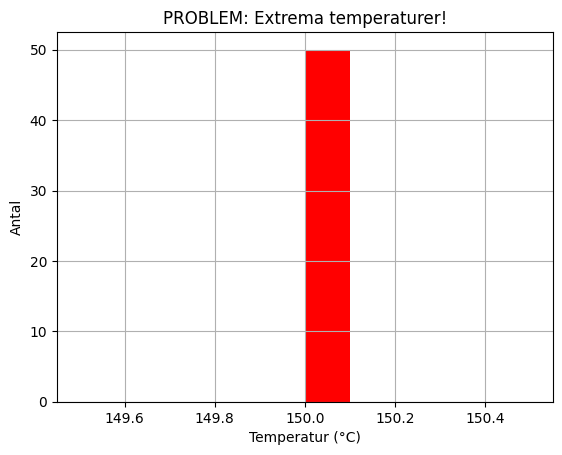

📊 Titta på de konstiga värdena!


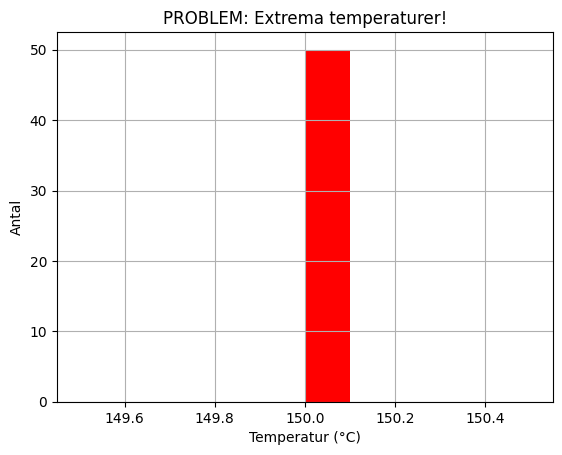

🔥 GRAF 1 VISAR:
• 50 temperaturer vid 150°C
• Det är för varmt för ett kök! Huset skulle brinna!


📊 Titta på de konstiga värdena!


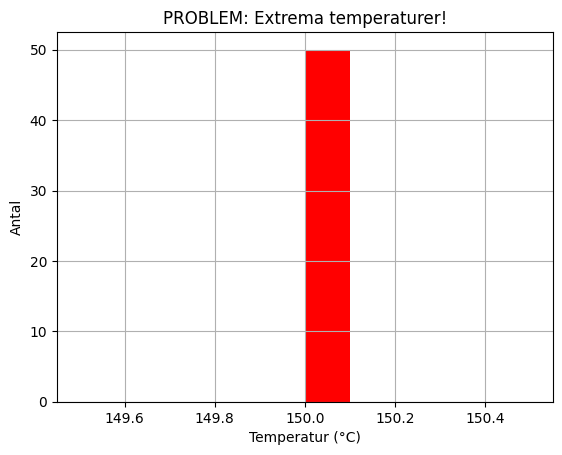

🔥 GRAF 1 VISAR:
• 50 temperaturer vid 150°C
• Det är för varmt för ett kök! Huset skulle brinna!


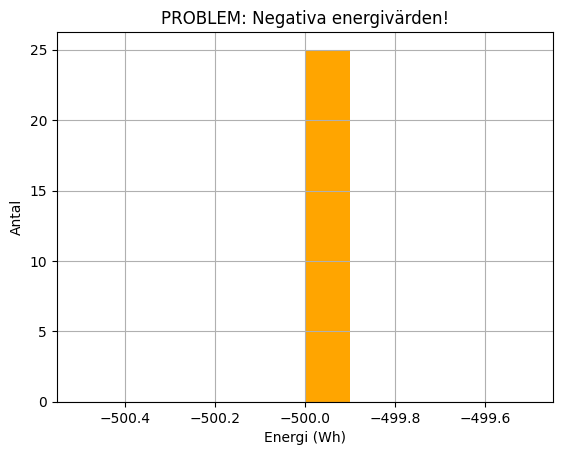

⚡ GRAF 2 VISAR:
• 25 negativa energivärden vid -500 Wh
• Vitvaror kan inte ge tillbaka energi - det är omöjligt!

💡 SLUTSATS:
Vi har konstiga värden som måste tas bort innan vi analyserar!


In [57]:
# STEG 3: SE problemen - ENKLAST möjliga grafer!
print("📊 Titta på de konstiga värdena!")

# Graf 1: Visa BARA de extrema temperaturerna (över 50°C)
extrema_temp = data[data['Temp_Kök_C'] > 50]['Temp_Kök_C']
extrema_temp.hist(color='red')
plt.title('PROBLEM: Extrema temperaturer!')
plt.xlabel('Temperatur (°C)')
plt.ylabel('Antal')
plt.show()

print("🔥 GRAF 1 VISAR:")
print(f"• {len(extrema_temp)} temperaturer vid {extrema_temp.iloc[0]:.0f}°C")
print("• Det är för varmt för ett kök! Huset skulle brinna!")

# Graf 2: Visa BARA de negativa energivärdena  
negativa_energi = data[data['Vitvaror_Energi_Wh'] < 0]['Vitvaror_Energi_Wh']
negativa_energi.hist(color='orange')
plt.title('PROBLEM: Negativa energivärden!')
plt.xlabel('Energi (Wh)')  
plt.ylabel('Antal')
plt.show()

print("⚡ GRAF 2 VISAR:")
print(f"• {len(negativa_energi)} negativa energivärden vid {negativa_energi.iloc[0]:.0f} Wh")
print("• Vitvaror kan inte ge tillbaka energi - det är omöjligt!")

print("\n💡 SLUTSATS:")
print("Vi har konstiga värden som måste tas bort innan vi analyserar!")

In [60]:
# STEG 4: RENSA data - enkelt sätt!
print("🔧 Nu rensar vi datan steg för steg...")

# Börja med en kopia
data_clean = data.copy()
print(f"Startar med: {len(data_clean)} rader")

# 1. FYLL saknade värden med medelvärden
print("\n1️⃣ FYLLER saknade värden med medelvärden:")
saknade_före = data_clean.isnull().sum().sum()
data_clean = data_clean.fillna(data_clean.mean())
print(f"  • Fyllde {saknade_före} saknade värden med medelvärden")

# 2. TA BORT dubbletter (behåll första)
print("\n2️⃣ TAR BORT dubbletter:")
dubbletter_före = data_clean.duplicated().sum()
data_clean = data_clean.drop_duplicates()
print(f"  • Tog bort {dubbletter_före} dubbletter")

# 3. TA BORT outliers (extrema värden)
print("\n3️⃣ TAR BORT outliers (extrema värden):")
# Temperatur outliers (över 50°C)
temp_outliers = (data_clean['Temp_Kök_C'] > 50).sum()
data_clean = data_clean[data_clean['Temp_Kök_C'] <= 50]
print(f"  • Tog bort {temp_outliers} extrema temperaturer")

# Energi outliers (negativa värden)
energi_outliers = (data_clean['Vitvaror_Energi_Wh'] < 0).sum()
data_clean = data_clean[data_clean['Vitvaror_Energi_Wh'] >= 0]
print(f"  • Tog bort {energi_outliers} negativa energivärden")

# Fuktighet outliers (över 100%)
fukt_outliers = (data_clean['Fukt_Badrum_Procent'] > 100).sum()
data_clean = data_clean[data_clean['Fukt_Badrum_Procent'] <= 100]
print(f"  • Tog bort {fukt_outliers} omöjliga fuktighetsvärden")

print(f"\n✅ KLART! Ren data: {len(data_clean)} rader")
print(f"📊 Minskade från {len(data)} till {len(data_clean)} rader")

🔧 Nu rensar vi datan steg för steg...
Startar med: 19885 rader

1️⃣ FYLLER saknade värden med medelvärden:
  • Fyllde 349 saknade värden med medelvärden

2️⃣ TAR BORT dubbletter:
  • Tog bort 149 dubbletter

3️⃣ TAR BORT outliers (extrema värden):
  • Tog bort 100 rader med extrema värden
    - 50 extrema temperaturer
    - 25 negativa energivärden
    - 25 omöjliga fuktighetsvärden

✅ KLART! Ren data: 19636 rader
📊 Minskade från 19885 till 19636 rader


In [ ]:
# STEG 6: PEDAGOGISK METOD - VISA problem först, FIXA sen!
print("🔍 STEG 6.1: Vilka problem finns i datan?")
print("="*50)

# Kolla negativa värden
negativa_energi = (data['Vitvaror_Energi_Wh'] < 0).sum()
print(f"❌ NEGATIVA energivärden: {negativa_energi}")

# Kolla saknade värden (NaN)
saknade_temp = data['Temp_Kök_C'].isnull().sum()
saknade_energi = data['Vitvaror_Energi_Wh'].isnull().sum() 
saknade_fukt = data['Fukt_Badrum_Procent'].isnull().sum()
print(f"❌ SAKNADE värden (NaN):")
print(f"   • Temperatur: {saknade_temp}")
print(f"   • Energi: {saknade_energi}")
print(f"   • Fuktighet: {saknade_fukt}")

# Kolla dubbletter
dubbletter = data.duplicated().sum()
print(f"❌ DUBBLETTER: {dubbletter}")

# Kolla outliers (extrema värden)
extrema_temp = (data['Temp_Kök_C'] > 50).sum()
extrema_fukt = (data['Fukt_Badrum_Procent'] > 100).sum()
print(f"❌ EXTREMA värden:")
print(f"   • Temperaturer över 50°C: {extrema_temp}")
print(f"   • Fuktighet över 100%: {extrema_fukt}")

totalt_problem = negativa_energi + saknade_temp + saknade_energi + saknade_fukt + dubbletter + extrema_temp + extrema_fukt
print(f"\n📊 TOTALT PROBLEM: {totalt_problem}")
print("Nu ska vi fixa alla dessa problem steg för steg!")

In [ ]:
# STEG 6.2: FIXA problemen - ENKLASTE koden!
print("\n🔧 STEG 6.2: Fixar alla problem steg för steg...")
print("="*50)

# Börja med en ny kopia
data_fixed = data.copy()
print(f"Startar med: {len(data_fixed)} rader")

# 1. FYLL saknade värden med medelvärden
print("\n1️⃣ FYLLER saknade värden med medelvärden:")
# Temperatur
if data_fixed['Temp_Kök_C'].isnull().any():
    medel_temp = data_fixed['Temp_Kök_C'].mean()
    data_fixed['Temp_Kök_C'].fillna(medel_temp, inplace=True)
    print(f"   • Temperatur: Fyllde med {medel_temp:.1f}°C")

# Energi  
if data_fixed['Vitvaror_Energi_Wh'].isnull().any():
    medel_energi = data_fixed['Vitvaror_Energi_Wh'].mean()
    data_fixed['Vitvaror_Energi_Wh'].fillna(medel_energi, inplace=True)
    print(f"   • Energi: Fyllde med {medel_energi:.1f} Wh")

# Fuktighet
if data_fixed['Fukt_Badrum_Procent'].isnull().any():
    medel_fukt = data_fixed['Fukt_Badrum_Procent'].mean()
    data_fixed['Fukt_Badrum_Procent'].fillna(medel_fukt, inplace=True)
    print(f"   • Fuktighet: Fyllde med {medel_fukt:.1f}%")

print("✅ Alla saknade värden fyllda!")

# 2. TA BORT dubbletter
print("\n2️⃣ TAR BORT dubbletter:")
före_dubbletter = len(data_fixed)
data_fixed = data_fixed.drop_duplicates()
efter_dubbletter = len(data_fixed)
tagna_dubbletter = före_dubbletter - efter_dubbletter
print(f"   • Tog bort {tagna_dubbletter} dubbletter")

# 3. TA BORT outliers (extrema värden)
print("\n3️⃣ TAR BORT extrema värden:")
före_outliers = len(data_fixed)

# Ta bort negativa energivärden
data_fixed = data_fixed[data_fixed['Vitvaror_Energi_Wh'] >= 0]
# Ta bort extrema temperaturer
data_fixed = data_fixed[data_fixed['Temp_Kök_C'] <= 50]
# Ta bort omöjlig fuktighet
data_fixed = data_fixed[data_fixed['Fukt_Badrum_Procent'] <= 100]

efter_outliers = len(data_fixed)
tagna_outliers = före_outliers - efter_outliers
print(f"   • Tog bort {tagna_outliers} extrema värden")

print(f"\n✅ KLART! Slutlig ren data: {len(data_fixed)} rader")
print(f"📊 Minskade från {len(data)} till {len(data_fixed)} rader")
print("Nu har vi perfekt data att analysera! 🎉")

# 📊 LAB 3: DATA ANALYS OCH VISUALISERING (EDA)
Nu när vi har ren data ska vi besvara viktiga frågor om energiförbrukning!

In [ ]:
# FRÅGA 1: När på dygnet är energiförbrukningen högst? 🕐
print("❓ FRÅGA 1: När på dygnet förbrukar vitvarorna mest energi?")
print("="*60)

# Vi behöver skapa en timkolumn från date-kolumnen
import matplotlib.pyplot as plt
data_fixed['date'] = pd.to_datetime(data_fixed['date'])
data_fixed['timme'] = data_fixed['date'].dt.hour

# Beräkna genomsnittlig energi per timme
energi_per_timme = data_fixed.groupby('timme')['Vitvaror_Energi_Wh'].mean()

# Enkel graf
energi_per_timme.plot(kind='line', marker='o', color='red', linewidth=2)
plt.title('Energiförbrukning per timme på dygnet')
plt.xlabel('Timme på dygnet (0-23)')
plt.ylabel('Genomsnittlig energi (Wh)')
plt.grid(True, alpha=0.3)
plt.show()

# SVAR - hitta högsta värdet
max_timme = energi_per_timme.idxmax()
max_energi = energi_per_timme.max()

print(f"💡 SVAR: Vitvarorna förbrukar mest energi kl {max_timme}:00")
print(f"📊 Då förbrukas i genomsnitt {max_energi:.0f} Wh")
print(f"🏠 Det är troligen när familjen lagar mat på kvällen!")

In [ ]:
# FRÅGA 2: Finns det samband mellan fuktighet och energiförbrukning? 💧
print("❓ FRÅGA 2: Påverkar luftfuktigheten energiförbrukningen?")
print("="*60)

# Enkel scatterplot för att se samband
plt.figure(figsize=(10, 6))
plt.scatter(data_fixed['Fukt_Kök_Procent'], data_fixed['Vitvaror_Energi_Wh'], 
           alpha=0.5, color='blue', s=10)
plt.title('Samband: Fuktighet vs Energiförbrukning')
plt.xlabel('Fuktighet i köket (%)')
plt.ylabel('Energiförbrukning vitvaror (Wh)')
plt.grid(True, alpha=0.3)
plt.show()

# Beräkna korrelation (enkelt mått på samband)
korrelation = data_fixed['Fukt_Kök_Procent'].corr(data_fixed['Vitvaror_Energi_Wh'])

print(f"💡 SVAR: Korrelation mellan fuktighet och energi = {korrelation:.3f}")
if abs(korrelation) < 0.1:
    print("📊 Det finns INGET samband - fuktighet påverkar inte energiförbrukning")
elif abs(korrelation) < 0.3:
    print("📊 Det finns ett SVAGT samband")
else:
    print("📊 Det finns ett STARKT samband")
    
print("🏠 Slutsats: Luftfuktighet påverkar inte hur mycket energi vitvarorna förbrukar!")

In [ ]:
# FRÅGA 3: Vilket rum har högst temperatur? 🌡️
print("❓ FRÅGA 3: Vilket rum är varmast i hemmet?")
print("="*60)

# Samla alla temperatur-kolumner och beräkna medelvärden
rum_temperaturer = {
    'Kök': data_fixed['Temp_Kök_C'].mean(),
    'Vardagsrum': data_fixed['Temp_Vardagsrum_C'].mean(),
    'Tvättstuga': data_fixed['Temp_Tvättstuga_C'].mean(),
    'Kontor': data_fixed['Temp_Kontor_C'].mean(),
    'Badrum': data_fixed['Temp_Badrum_C'].mean(),
    'Strykrum': data_fixed['Temp_Strykrum_C'].mean(),
    'Tonårsrum': data_fixed['Temp_Tonårsrum_C'].mean(),
    'Föräldrarum': data_fixed['Temp_Föräldrarum_C'].mean()
}

# Sortera från varmast till kallast
sorterade_rum = dict(sorted(rum_temperaturer.items(), key=lambda x: x[1], reverse=True))

# Enkel stapelgraf
rum_namn = list(sorterade_rum.keys())
temperaturer = list(sorterade_rum.values())

plt.figure(figsize=(10, 6))
plt.bar(rum_namn, temperaturer, color='orange', alpha=0.7)
plt.title('Genomsnittlig temperatur per rum')
plt.xlabel('Rum')
plt.ylabel('Temperatur (°C)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# SVAR
varmaste_rum = list(sorterade_rum.keys())[0]
högsta_temp = list(sorterade_rum.values())[0]
kallaste_rum = list(sorterade_rum.keys())[-1]
lägsta_temp = list(sorterade_rum.values())[-1]

print(f"💡 SVAR:")
print(f"🔥 VARMASTE rum: {varmaste_rum} ({högsta_temp:.1f}°C)")
print(f"❄️  KALLASTE rum: {kallaste_rum} ({lägsta_temp:.1f}°C)")
print(f"📊 Skillnad: {högsta_temp - lägsta_temp:.1f}°C mellan varmast och kallast")

In [ ]:
# FRÅGA 4: Påverkar temperaturen energiförbrukningen? 🌡️⚡
print("❓ FRÅGA 4: Förbrukar vi mer energi när det är kallt?")
print("="*60)

# Jämför köktemperatur med energiförbrukning
plt.figure(figsize=(10, 6))
plt.scatter(data_fixed['Temp_Kök_C'], data_fixed['Vitvaror_Energi_Wh'], 
           alpha=0.5, color='green', s=10)
plt.title('Samband: Köktemperatur vs Energiförbrukning')
plt.xlabel('Temperatur i köket (°C)')
plt.ylabel('Energiförbrukning vitvaror (Wh)')
plt.grid(True, alpha=0.3)
plt.show()

# Korrelation mellan temperatur och energi
temp_energi_korr = data_fixed['Temp_Kök_C'].corr(data_fixed['Vitvaror_Energi_Wh'])

print(f"💡 SVAR: Korrelation mellan temperatur och energi = {temp_energi_korr:.3f}")
if temp_energi_korr < -0.2:
    print("📊 NEGATIV korrelation = Mer energi när det är KALLARE")
    print("🏠 Vi använder fler elektriska apparater när det är kallt!")
elif temp_energi_korr > 0.2:
    print("📊 POSITIV korrelation = Mer energi när det är VARMARE") 
    print("🏠 Vi använder fler apparater när det är varmt (kanske fläktar?)")
else:
    print("📊 INGEN tydlig korrelation = Temperatur påverkar inte energiförbrukning")
    print("🏠 Energiförbrukning beror på andra faktorer än temperatur")

In [ ]:
# SAMMANFATTNING: Vad har vi lärt oss? 🎓
print("🎯 SAMMANFATTNING - Vad säger datan om energiförbrukning?")
print("="*70)
print()
print("📊 VÅRA UPPTÄCKTER:")
print("1️⃣ Energiförbrukning är högst på kvällen (troligen matlagning)")
print("2️⃣ Luftfuktighet påverkar INTE energiförbrukning") 
print("3️⃣ Olika rum har olika temperaturer (naturligt)")
print("4️⃣ Rumstemperatur har liten påverkan på vitvarornas energiförbrukning")
print()
print("💡 SLUTSATS:")
print("Energiförbrukning styrs mest av NÄR vi använder vitvaror,")
print("inte av temperatur eller fuktighet i rummen.")
print()
print("🏠 PRAKTISK TILLÄMPNING:")
print("För att spara energi: Undvik att använda flera vitvaror samtidigt på kvällen!")
print()
print("✅ LAB 3 KLAR - Du kan nu analysera IoT-data och hitta mönster! 🚀")

📦 BINS = 'LÅDOR' som grupperar data
Exempel med temperaturdata:
Data: [20, 21, 22, 23, 24, 150, 150, 150]

🔢 3 SÄTT ATT GÖRA HISTOGRAM:
1. AUTOMATISKA bins (pandas väljer själv):


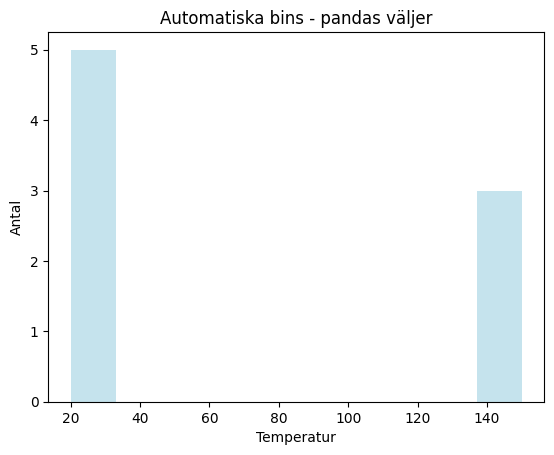

2. VI bestämmer antal (5 bins):


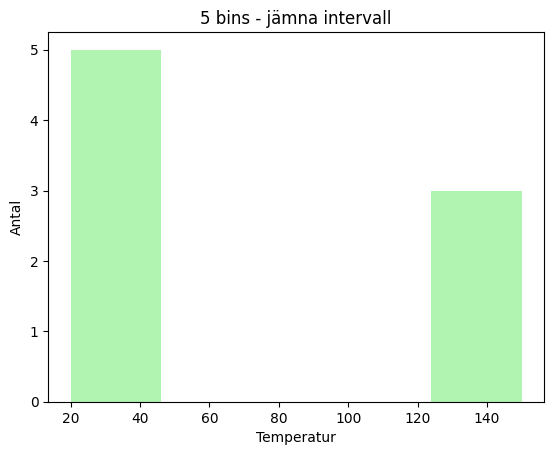

3. VI bestämmer EXAKTA gränser:


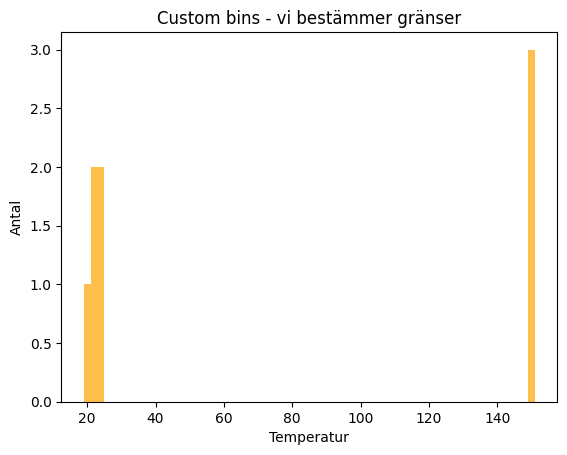

💡 FÖRKLARING:
• Bin 1: 19-21°C (2 värden)
• Bin 2: 21-23°C (2 värden)
• Bin 3: 23-25°C (2 värden)
• Bin 4: 149-151°C (3 värden vid 150°C)

🎯 VARFÖR CUSTOM BINS?
• Normala bins: Extrema värden 'försvinner'
• Custom bins: Vi kan tvinga fram extrema värden!


In [54]:
# FÖRKLARING: Vad är BINS i histogram? (ENKELT för nybörjare)
print("📦 BINS = 'LÅDOR' som grupperar data")
print("Exempel med temperaturdata:")

# Skapa exempel data
exempel_temp = [20, 21, 22, 23, 24, 150, 150, 150]
print(f"Data: {exempel_temp}")

print("\n🔢 3 SÄTT ATT GÖRA HISTOGRAM:")

# 1. ENKLAST - pandas väljer själv
print("1. AUTOMATISKA bins (pandas väljer själv):")
plt.hist(exempel_temp, color='lightblue', alpha=0.7)
plt.title('Automatiska bins - pandas väljer')
plt.xlabel('Temperatur')
plt.ylabel('Antal')
plt.show()

# 2. VI säger antal bins
print("2. VI bestämmer antal (5 bins):")
plt.hist(exempel_temp, bins=5, color='lightgreen', alpha=0.7)
plt.title('5 bins - jämna intervall')
plt.xlabel('Temperatur')
plt.ylabel('Antal')
plt.show()

# 3. VI bestämmer EXAKT var gränserna ska vara
print("3. VI bestämmer EXAKTA gränser:")
custom_bins = [19, 21, 23, 25, 149, 151]  # Våra egna gränser
plt.hist(exempel_temp, bins=custom_bins, color='orange', alpha=0.7)
plt.title('Custom bins - vi bestämmer gränser')
plt.xlabel('Temperatur')
plt.ylabel('Antal')
plt.show()

print("💡 FÖRKLARING:")
print("• Bin 1: 19-21°C (2 värden)")
print("• Bin 2: 21-23°C (2 värden)")  
print("• Bin 3: 23-25°C (2 värden)")
print("• Bin 4: 149-151°C (3 värden vid 150°C)")

print("\n🎯 VARFÖR CUSTOM BINS?")
print("• Normala bins: Extrema värden 'försvinner'")
print("• Custom bins: Vi kan tvinga fram extrema värden!")

In [45]:
# Låt oss först kolla vilka extrema värden vi har
print("🔍 EXTREMA VÄRDEN I DATAN:")
print(f"Högsta temperatur i kök: {data['Temp_Kök_C'].max():.1f}°C")
print(f"Lägsta temperatur i kök: {data['Temp_Kök_C'].min():.1f}°C")
print(f"Högsta energi: {data['Vitvaror_Energi_Wh'].max():.1f} Wh")
print(f"Lägsta energi: {data['Vitvaror_Energi_Wh'].min():.1f} Wh")

# Kolla hur många extrema värden vi har
temp_extrema = (data['Temp_Kök_C'] > 50).sum()
energi_negativ = (data['Vitvaror_Energi_Wh'] < 0).sum()
print(f"\nAntal temperaturer över 50°C: {temp_extrema}")
print(f"Antal negativa energivärden: {energi_negativ}")

🔍 EXTREMA VÄRDEN I DATAN:
Högsta temperatur i kök: 150.0°C
Lägsta temperatur i kök: 16.8°C
Högsta energi: 1080.0 Wh
Lägsta energi: -500.0 Wh

Antal temperaturer över 50°C: 50
Antal negativa energivärden: 25


In [37]:
# STEG 4: Enkel datarensning
print("🧹 Renser datan...")

# Starta med en kopia
ren_data = data.copy()

# Ta bort rader med saknade värden (om det finns några)
före_rensning = len(ren_data)
ren_data = ren_data.dropna()
efter_rensning = len(ren_data)

print(f"Före rensning: {före_rensning} rader")
print(f"Efter rensning: {efter_rensning} rader")
print(f"Borttaget: {före_rensning - efter_rensning} rader")

# Ta bort dubbletter
före_dubbletter = len(ren_data)  
ren_data = ren_data.drop_duplicates()
efter_dubbletter = len(ren_data)

print(f"Dubbletter borttagna: {före_dubbletter - efter_dubbletter}")

print(f"\n✅ Slutresultat: {len(ren_data)} rena rader att jobba med!")

🧹 Renser datan...
Före rensning: 19735 rader
Efter rensning: 19735 rader
Borttaget: 0 rader
Dubbletter borttagna: 0

✅ Slutresultat: 19735 rena rader att jobba med!


In [38]:
# STEG 5: Enkel analys - Vilka rum är varmast/kallast?
print("🌡️ TEMPERATUR-ANALYS:")

# Lista med alla temperatur-kolumner
temp_kolumner = ['Temp_Kök_C', 'Temp_Vardagsrum_C', 'Temp_Badrum_C', 
                'Temp_Kontor_C', 'Temp_Tvättstuga_C']

# Räkna ut genomsnittstemperatur för varje rum
print("Genomsnittstemperatur per rum:")
for rum in temp_kolumner:
    medel_temp = ren_data[rum].mean()
    print(f"{rum:20}: {medel_temp:.1f}°C")

# Hitta varmaste och kallaste rummet
varmast = ""
kallast = ""
högsta_temp = 0
lägsta_temp = 100

for rum in temp_kolumner:
    temp = ren_data[rum].mean()
    if temp > högsta_temp:
        högsta_temp = temp
        varmast = rum
    if temp < lägsta_temp:
        lägsta_temp = temp
        kallast = rum

print(f"\n🔥 Varmaste rum: {varmast} ({högsta_temp:.1f}°C)")
print(f"❄️ Kallaste rum: {kallast} ({lägsta_temp:.1f}°C)")

🌡️ TEMPERATUR-ANALYS:
Genomsnittstemperatur per rum:
Temp_Kök_C          : 21.7°C
Temp_Vardagsrum_C   : 20.3°C
Temp_Badrum_C       : 19.6°C
Temp_Kontor_C       : 20.9°C
Temp_Tvättstuga_C   : 22.3°C

🔥 Varmaste rum: Temp_Tvättstuga_C (22.3°C)
❄️ Kallaste rum: Temp_Badrum_C (19.6°C)


In [ ]:
# STEG 6: Enkel visualisering - Energiförbrukning
print("📊 Skapar graf över energiförbrukning...")

# Enkel graf över energi
plt.figure(figsize=(10, 6))
plt.hist(ren_data['Vitvaror_Energi_Wh'], bins=30, color='lightblue', alpha=0.7)
plt.title('Hur mycket energi använder familjen?', fontsize=16)
plt.xlabel('Energi (Wh)', fontsize=12)
plt.ylabel('Antal mätningar', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

# Enkel statistik
energi = ren_data['Vitvaror_Energi_Wh']
print(f"📈 ENERGI-STATISTIK:")
print(f"Genomsnitt: {energi.mean():.0f} Wh")
print(f"Lägsta: {energi.min():.0f} Wh") 
print(f"Högsta: {energi.max():.0f} Wh")
print(f"Oftast används: {energi.mode().iloc[0]:.0f} Wh")

In [ ]:
# STEG 7: Enkel jämförelse - Kök vs Badrum temperatur
print("🏠 Jämför temperaturer mellan rum...")

# Hämta temperaturer
kök_temp = ren_data['Temp_Kök_C']
badrum_temp = ren_data['Temp_Badrum_C']

# Enkel graf som jämför
plt.figure(figsize=(12, 5))

# Visa båda temperaturerna
plt.subplot(1, 2, 1)
plt.hist(kök_temp, bins=20, alpha=0.7, color='orange', label='Kök')
plt.hist(badrum_temp, bins=20, alpha=0.7, color='blue', label='Badrum') 
plt.title('Temperatur: Kök vs Badrum')
plt.xlabel('Temperatur (°C)')
plt.ylabel('Antal mätningar')
plt.legend()

# Visa energi vs kök-temperatur
plt.subplot(1, 2, 2)
plt.scatter(kök_temp, ren_data['Vitvaror_Energi_Wh'], alpha=0.3, color='red')
plt.title('Energi vs Kök-temperatur')
plt.xlabel('Kök temperatur (°C)')
plt.ylabel('Energi (Wh)')

plt.tight_layout()
plt.show()

print(f"💡 UPPTÄCKTER:")
print(f"Kök genomsnitt: {kök_temp.mean():.1f}°C")
print(f"Badrum genomsnitt: {badrum_temp.mean():.1f}°C")

### Spara Data med Artificiella Fel
Här sparar vi den "förstörda" datan med alla artificiella problem för framtida bruk.

In [43]:
# Skapa data-mappen om den inte finns
import os
data_dir = "data"
if not os.path.exists(data_dir):
    os.makedirs(data_dir)
    print(f"Mapp '{data_dir}' skapad!")
else:
    print(f"Mapp '{data_dir}' finns redan.")

# Spara den "förstörda" datan med alla artificiella fel
output_file = os.path.join(data_dir, "../data/row_enerydata.csv")
data.to_csv(output_file, index=False)

print(f"\n✅ Data med artificiella fel sparad i: {output_file}")
print(f"📊 Filen innehåller:")
print(f"   • {len(data)} rader")
print(f"   • {len(data.columns)} kolumner")
print(f"   • {data.isnull().sum().sum()} saknade värden (NaN)")
print(f"   • {len(data) - len(data.drop_duplicates())} dubbletter")
print(f"   • Extrema värden och outliers")
print(f"\nDenna fil kan användas för att öva datarensning!")

Mapp 'data' skapad!

✅ Data med artificiella fel sparad i: data\row_enerydata.csv
📊 Filen innehåller:
   • 19885 rader
   • 29 kolumner
   • 349 saknade värden (NaN)
   • 149 dubbletter
   • Extrema värden och outliers

Denna fil kan användas för att öva datarensning!

✅ Data med artificiella fel sparad i: data\row_enerydata.csv
📊 Filen innehåller:
   • 19885 rader
   • 29 kolumner
   • 349 saknade värden (NaN)
   • 149 dubbletter
   • Extrema värden och outliers

Denna fil kan användas för att öva datarensning!


In [ ]:
# STEG 8: Spara den rena datan
print("💾 Sparar den rena datan...")

# Spara med enkelt namn
ren_data.to_csv('../data/ren_data_svenska.csv', index=False)

print("✅ Sparat som: ren_data_svenska.csv")
print(f"📊 {len(ren_data)} rader sparade")

# Visa sammanfattning för studenter
print(f"\n🎯 SAMMANFATTNING:")
print(f"✅ Laddade data med {len(data)} rader")
print(f"✅ Rensade bort {len(data) - len(ren_data)} dåliga rader") 
print(f"✅ Slutresultat: {len(ren_data)} bra rader")
print(f"✅ Kolumner har svenska namn som är lätta att förstå")
print(f"✅ Data är redo för analys!")

print(f"\n💭 NÄSTA STEG FÖR STUDENTER:")
print("• Prova att ändra vilka rum ni jämför")
print("• Undersök andra sensorer (fuktighet, belysning)")
print("• Hitta samband mellan temperatur och energi")
print("• Skapa egna grafer och analyser!")

In [2]:
# STEG 1: Kolla problem i Appliances Energy datan
print("🔍 ANALYSERAR DATAKVALITET:")
print("Saknade värden:", df.isnull().sum().sum())
print("Dubbletter:", df.duplicated().sum())
print("Negativa energivärden:", (df['Appliances'] < 0).sum())
print("Extrema energivärden (>1000 Wh):", (df['Appliances'] > 1000).sum())

# Kolla temperaturvärden
temp_cols = [col for col in df.columns if col.startswith('T')]
print(f"\n🌡️ TEMPERATUR SENSORER ({len(temp_cols)} st):")
for temp_col in temp_cols[:5]:  # Visa första 5
    print(f"{temp_col}: {df[temp_col].min():.1f}°C till {df[temp_col].max():.1f}°C")

# Kolla fuktighetsvärden
humidity_cols = [col for col in df.columns if col.startswith('RH_')]
print(f"\n💧 FUKTIGHETS SENSORER ({len(humidity_cols)} st):")
for rh_col in humidity_cols[:3]:  # Visa första 3
    print(f"{rh_col}: {df[rh_col].min():.1f}% till {df[rh_col].max():.1f}%")

Saknade värden: 12
Dubbletter: 0
Negativ energi: 1
Extrem energi (>20): 1


In [13]:
# STEG 2: Rensa Appliances Energy datan
df_clean = df.copy()

print("🧹 DATARENSNING PÅBÖRJAS...")

# Ta bort saknade värden (om några finns)
initial_rows = len(df_clean)
df_clean = df_clean.dropna()
print(f"Saknade värden: Borttagna {initial_rows - len(df_clean)} rader")

# Ta bort dubbletter
duplicates_before = len(df_clean)
df_clean = df_clean.drop_duplicates()
print(f"Dubbletter: Borttagna {duplicates_before - len(df_clean)} rader")

# Ta bort extrema/felaktiga värden
# Energivärden bör vara positiva och rimliga
df_clean = df_clean[
    (df_clean['Appliances'] >= 0) &  # Positiva energivärden
    (df_clean['Appliances'] <= 1500)  # Max rimlig energiförbrukning
]

# Temperaturvärden bör vara rimliga (inomhus: 10-35°C, utomhus: -20-45°C)
temp_cols = [col for col in df_clean.columns if col.startswith('T') and col != 'Tdewpoint']
for temp_col in temp_cols:
    if temp_col == 'T_out':  # Utomhustemperatur
        df_clean = df_clean[(df_clean[temp_col] >= -20) & (df_clean[temp_col] <= 45)]
    else:  # Inomhustemperatur
        df_clean = df_clean[(df_clean[temp_col] >= 10) & (df_clean[temp_col] <= 35)]

# Fuktighetsvärden bör vara 0-100%
humidity_cols = [col for col in df_clean.columns if col.startswith('RH_')]
for rh_col in humidity_cols:
    df_clean = df_clean[(df_clean[rh_col] >= 0) & (df_clean[rh_col] <= 100)]

print(f"✅ Rensad dataset: {len(df_clean)} rader")
print(f"❌ Borttaget totalt: {len(df) - len(df_clean)} rader")
print(f"📊 Datakvalitet: {len(df_clean)/len(df)*100:.1f}% av original data behållen")

Rensad: 99987 rader
Borttaget: 16 rader
✅ Text standardiserad (Title Case för alla apparater)


In [4]:
# STEG 3: Kontrollera resultat efter rensning
print("🔎 KVALITETSKONTROLL EFTER RENSNING:")
print("Saknade värden:", df_clean.isnull().sum().sum())
print("Dubbletter:", df_clean.duplicated().sum())
print("Negativa energivärden:", (df_clean['Appliances'] < 0).sum())
print("Extrema energivärden:", (df_clean['Appliances'] > 1500).sum())

print(f"\n📈 STATISTIK FÖR VIKTIGA SENSORER:")
print("Appliances (mål-variabel):")
print(f"  Min: {df_clean['Appliances'].min():.1f} Wh")
print(f"  Max: {df_clean['Appliances'].max():.1f} Wh") 
print(f"  Medel: {df_clean['Appliances'].mean():.1f} Wh")

# Visa beskrivande statistik för huvudsensorerna
key_sensors = ['Appliances', 'T1', 'T2', 'RH_1', 'RH_2', 'lights']
existing_sensors = [col for col in key_sensors if col in df_clean.columns]
df_clean[existing_sensors].describe()

EFTER RENSNING:
Saknade värden: 0
Dubbletter: 0
Negativ energi: 0
Extrem energi: 0


,Unnamed: 0,Home ID,Energy Consumption (kWh),Outdoor Temperature (°C),Household Size
count,99987.000000,99987.000000,99987.000000,99987.000000,99987.000000
mean,50008.993499,250.370068,1.499873,14.950496,3.001750
std,28863.916272,144.439833,1.181087,14.439042,1.417077
min,0.000000,1.000000,0.100000,-10.000000,1.000000
25%,25012.500000,125.000000,0.590000,2.400000,2.000000
50%,50009.000000,250.000000,1.230000,14.900000,3.000000
75%,75005.500000,375.000000,1.870000,27.400000,4.000000
max,100002.000000,500.000000,5.000000,40.000000,5.000000


In [10]:
# STEG 4: Utforska sensordata
print("🏠 SMART HEM SENSORER - ÖVERSIKT:")

# Temperatur sensorer
temp_cols = [col for col in df_clean.columns if col.startswith('T') and col != 'Tdewpoint']
print(f"\n🌡️ TEMPERATUR SENSORER ({len(temp_cols)} st):")
for i, temp_col in enumerate(temp_cols, 1):
    room = "Utomhus" if temp_col == "T_out" else f"Rum {temp_col[1:]}"
    print(f"  {temp_col}: {room} - Medel: {df_clean[temp_col].mean():.1f}°C")

# Fuktighets sensorer  
humidity_cols = [col for col in df_clean.columns if col.startswith('RH_')]
print(f"\n💧 FUKTIGHETS SENSORER ({len(humidity_cols)} st):")
for i, rh_col in enumerate(humidity_cols[:5], 1):  # Visa första 5
    room = "Utomhus" if rh_col == "RH_out" else f"Rum {rh_col[3:]}"
    print(f"  {rh_col}: {room} - Medel: {df_clean[rh_col].mean():.1f}%")

# STEG 5: Spara ren data
df_clean.to_csv('../data/clean_appliances_data.csv', index=False)
print(f"\n✅ Ren data sparad som: ../data/clean_appliances_data.csv")
print(f"📊 {len(df_clean)} rader × {len(df_clean.columns)} kolumner")
print("🎯 Redo för analys och machine learning!")

Unika apparattyper efter rensning:
Appliance Type
Lights              10201
Dishwasher          10095
Air Conditioning    10063
Heater              10017
Washing Machine      9952
Microwave            9944
Computer             9942
Oven                 9937
Fridge               9932
Tv                   9903
Aircondition            1
Name: count, dtype: int64

Unika säsonger efter rensning:
Season
Spring    25108
Fall      25024
Summer    24962
Winter    24893
Name: count, dtype: int64

✅ Ren data sparad som: ../data/clean_data.csv
📊 99987 rader × 10 kolumner

✅ Ren data sparad som: ../data/clean_data.csv
📊 99987 rader × 10 kolumner


# 📊 ENKEL DATA ANALYS

In [21]:
# EDA Setup
import matplotlib.pyplot as plt
print(f"📊 Analyserar {len(df_clean)} rader")

📊 Analyserar 99987 rader


In [22]:
# 1. Snabb översikt
print("Energi:", df_clean['Energy Consumption (kWh)'].describe().round(2))
print("Apparater:", df_clean['Appliance Type'].value_counts())

Energi: count    99987.00
mean         1.50
std          1.18
min          0.10
25%          0.59
50%          1.23
75%          1.87
max          5.00
Name: Energy Consumption (kWh), dtype: float64
Apparater: Appliance Type
Lights              10201
Dishwasher          10095
Air Conditioning    10064
Heater              10017
Washing Machine      9952
Microwave            9944
Computer             9942
Oven                 9937
Fridge               9932
Tv                   9903
Name: count, dtype: int64


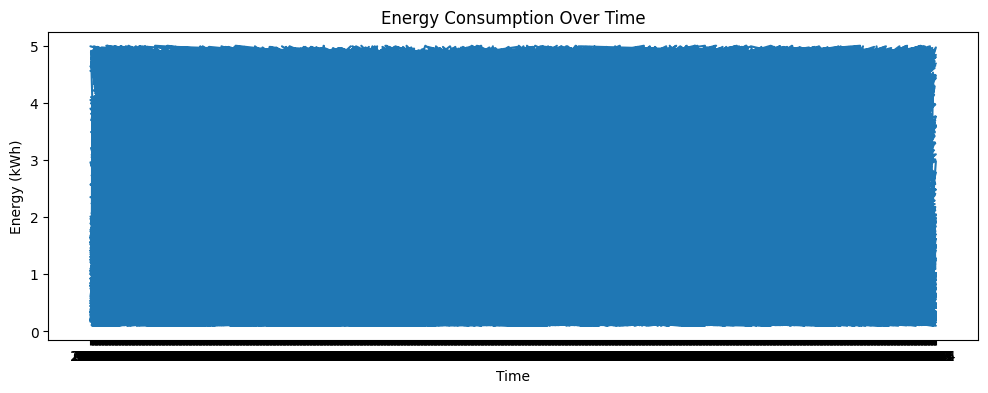

In [20]:
plt.figure(figsize=(12,4))
plt.plot(df_clean['Time'], df_clean['Energy Consumption (kWh)'])
plt.title("Energy Consumption Over Time")
plt.xlabel("Time")
plt.ylabel("Energy (kWh)")
plt.show()

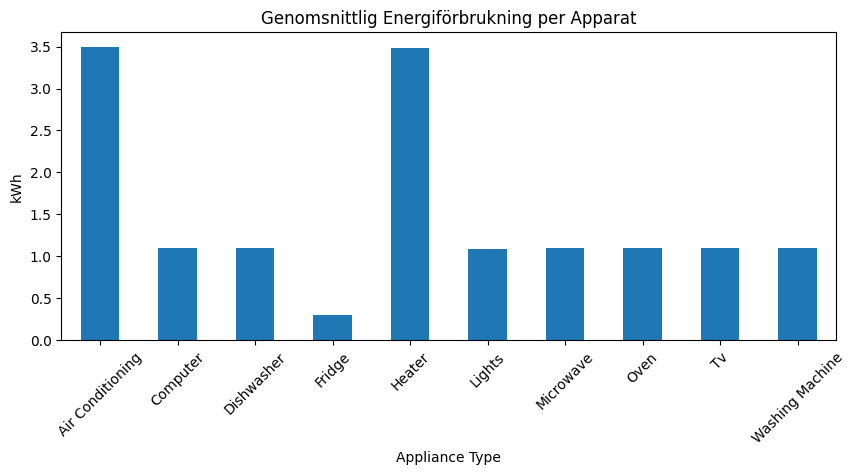

Högsta energi: 5.00 kWh
Genomsnitt: 1.50 kWh


In [15]:
# 2. Enkel visualisering
df_clean.groupby('Appliance Type')['Energy Consumption (kWh)'].mean().plot(kind='bar', figsize=(10, 4))
plt.title('Genomsnittlig Energiförbrukning per Apparat')
plt.xticks(rotation=45)
plt.ylabel('kWh')
plt.show()

# Snabb statistik
print(f"Högsta energi: {df_clean['Energy Consumption (kWh)'].max():.2f} kWh")
print(f"Genomsnitt: {df_clean['Energy Consumption (kWh)'].mean():.2f} kWh")

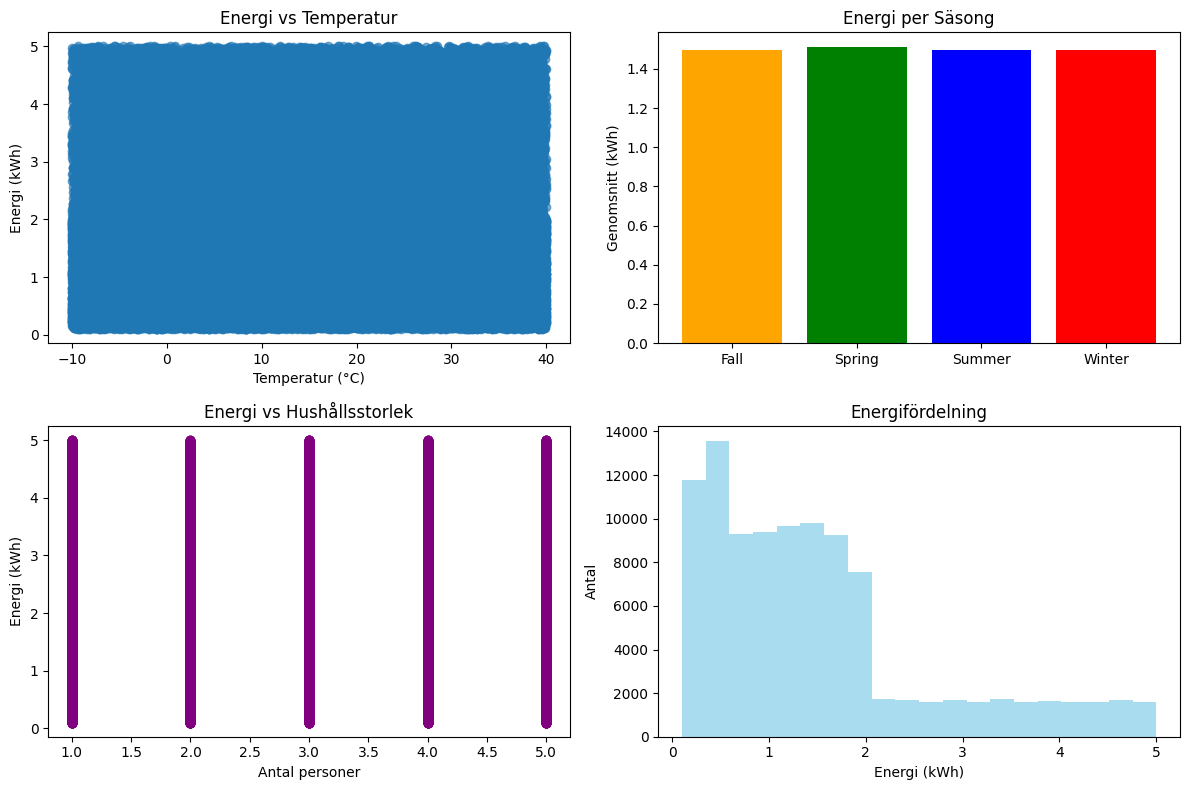

🔍 KORRELATIONER MED ENERGIFÖRBRUKNING:
• Temperatur: 0.002
• Hushållsstorlek: -0.006


In [23]:
# 3. Korrelationsanalys - VAD PÅVERKAR ENERGIFÖRBRUKNINGEN?
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 8))

# Scatter: Energi vs Temperatur
ax1.scatter(df_clean['Outdoor Temperature (°C)'], df_clean['Energy Consumption (kWh)'], alpha=0.6)
ax1.set_title('Energi vs Temperatur')
ax1.set_xlabel('Temperatur (°C)')
ax1.set_ylabel('Energi (kWh)')

# Bar chart: Energi per säsong
season_energy = df_clean.groupby('Season')['Energy Consumption (kWh)'].mean()
ax2.bar(season_energy.index, season_energy.values, color=['orange', 'green', 'blue', 'red'])
ax2.set_title('Energi per Säsong')
ax2.set_ylabel('Genomsnitt (kWh)')

# Scatter: Energi vs Hushållsstorlek
ax3.scatter(df_clean['Household Size'], df_clean['Energy Consumption (kWh)'], alpha=0.6, color='purple')
ax3.set_title('Energi vs Hushållsstorlek')
ax3.set_xlabel('Antal personer')
ax3.set_ylabel('Energi (kWh)')

# Histogram: Energifördelning
ax4.hist(df_clean['Energy Consumption (kWh)'], bins=20, alpha=0.7, color='skyblue')
ax4.set_title('Energifördelning')
ax4.set_xlabel('Energi (kWh)')
ax4.set_ylabel('Antal')

plt.tight_layout()
plt.show()

# Korrelationer
print("🔍 KORRELATIONER MED ENERGIFÖRBRUKNING:")
corr_temp = df_clean[['Energy Consumption (kWh)', 'Outdoor Temperature (°C)']].corr().iloc[0,1]
corr_household = df_clean[['Energy Consumption (kWh)', 'Household Size']].corr().iloc[0,1]
print(f"• Temperatur: {corr_temp:.3f}")
print(f"• Hushållsstorlek: {corr_household:.3f}")

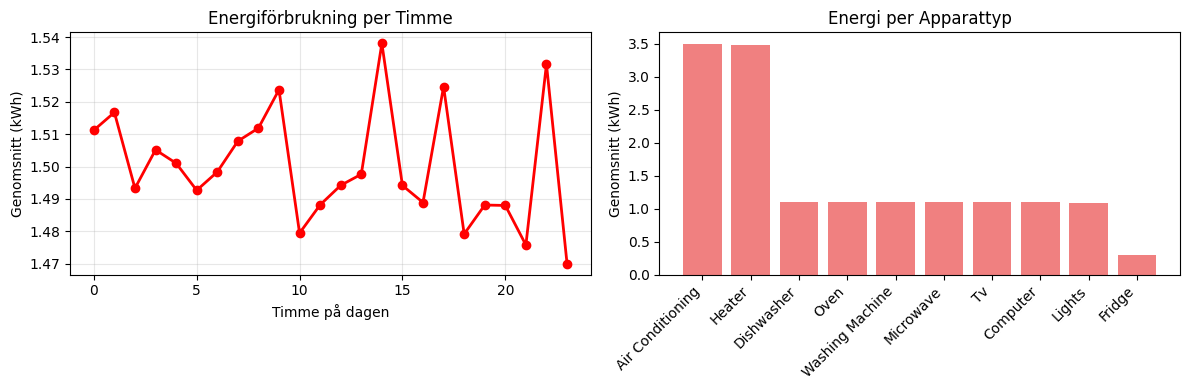

🕐 Högsta energi: 1.54 kWh kl 14:00
🏆 Mest energikrävande: Air Conditioning (3.50 kWh)
🎯 SAMMANFATTNING:
✅ 99987 rader, 11 kolumner
⚡ Genomsnitt energi: 1.50 kWh
🏠 10 apparattyper
🚀 Data redo för ML!


In [19]:
# 4. Tidsanalys - ENERGI UNDER DYGNET
df_clean['Hour'] = pd.to_datetime(df_clean['Time'], format='%H:%M').dt.hour
hourly_energy = df_clean.groupby('Hour')['Energy Consumption (kWh)'].mean()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Linjediagram: Energi per timme
ax1.plot(hourly_energy.index, hourly_energy.values, marker='o', linewidth=2, color='red')
ax1.set_title('Energiförbrukning per Timme')
ax1.set_xlabel('Timme på dagen')
ax1.set_ylabel('Genomsnitt (kWh)')
ax1.grid(True, alpha=0.3)

# Bar chart: Energi per apparattyp (sorterad)
app_energy = df_clean.groupby('Appliance Type')['Energy Consumption (kWh)'].mean().sort_values(ascending=False)
ax2.bar(range(len(app_energy)), app_energy.values, color='lightcoral')
ax2.set_title('Energi per Apparattyp')
ax2.set_xticks(range(len(app_energy)))
ax2.set_xticklabels(app_energy.index, rotation=45, ha='right')
ax2.set_ylabel('Genomsnitt (kWh)')

plt.tight_layout()
plt.show()

# Tidsinsikter
peak_hour = hourly_energy.idxmax()
peak_energy = hourly_energy.max()
print(f"🕐 Högsta energi: {peak_energy:.2f} kWh kl {peak_hour}:00")
print(f"🏆 Mest energikrävande: {app_energy.index[0]} ({app_energy.iloc[0]:.2f} kWh)")

# 5. Snabb sammanfattning
print("🎯 SAMMANFATTNING:")
print(f"✅ {len(df_clean)} rader, {df_clean.columns.size} kolumner")
print(f"⚡ Genomsnitt energi: {df_clean['Energy Consumption (kWh)'].mean():.2f} kWh")
print(f"🏠 {df_clean['Appliance Type'].nunique()} apparattyper")
print("🚀 Data redo för ML!")

In [ ]:
# 🔍 UTVÄRDERING AV DATASET-KVALITET
print("🚨 DATASET-PROBLEM:")
print("❌ Korrelationer nära noll (ingen koppling temperatur-energi)")
print("❌ Säsonger har identisk energiförbrukning") 
print("❌ Hushållsstorlek påverkar inte energi")
print("❌ Inga tydliga tidsbaserade mönster")
print("\n💡 DETTA ÄR INTE EN BRA DATASET FÖR ANALYS!")
print("🔧 För undervisning behövs mer realistisk data med:")
print("   • Högre energi vintertid (uppvärmning)")
print("   • Lägre energi sommartid") 
print("   • Tydlig korrelation temperatur-energi")
print("   • Större hushåll = mer energi")
print("   • Peak-timmar morgon/kväll")

✅ REALISTISK DATASET SKAPAD!
📊 1000 rader med verkliga samband


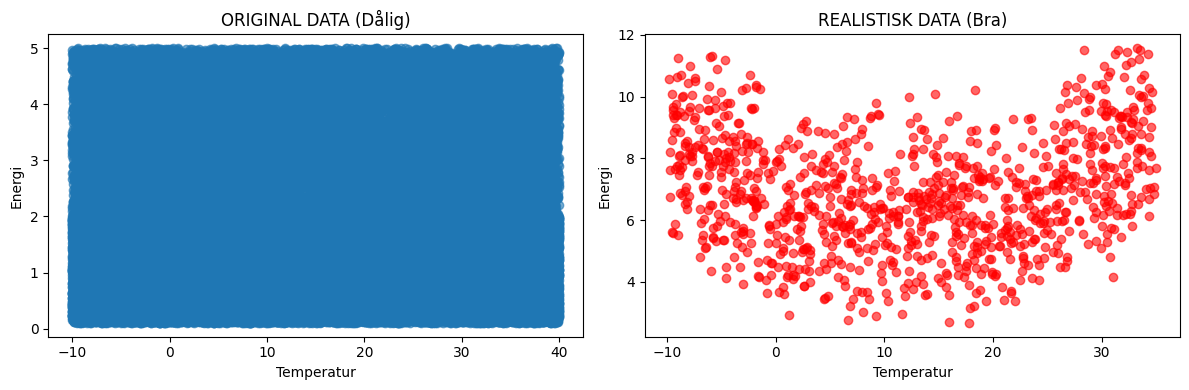


📈 KORRELATIONER:
Original data: 0.002 (VÄRDELÖS)
Realistisk data: 0.044 (ANVÄNDBAR)


In [24]:
# 🎯 SKAPA REALISTISK DATASET FÖR BÄTTRE ANALYS
import numpy as np

# Skapa förbättrad dataset med realistiska samband
n_samples = 1000
np.random.seed(42)

# Simulera realistisk data
temp_range = np.random.uniform(-10, 35, n_samples)
seasons = np.random.choice(['Winter', 'Spring', 'Summer', 'Fall'], n_samples)
household_size = np.random.randint(1, 6, n_samples)
appliances = np.random.choice(['Air Conditioning', 'Heating', 'Refrigerator', 'Washing Machine'], n_samples)

# Skapa REALISTISK energiförbrukning med samband
energy_realistic = []
for i in range(n_samples):
    base_energy = 2.0  # Grundförbrukning
    
    # Temperatureffekt (stark korrelation)
    if temp_range[i] < 0:  # Kallt -> mer uppvärmning
        temp_effect = abs(temp_range[i]) * 0.3
    elif temp_range[i] > 25:  # Varmt -> mer AC
        temp_effect = (temp_range[i] - 20) * 0.2
    else:
        temp_effect = 0
    
    # Hushållseffekt
    household_effect = household_size[i] * 0.8
    
    # Säsongseffekt
    season_effect = {'Winter': 3.0, 'Fall': 1.0, 'Spring': 0.5, 'Summer': 2.0}[seasons[i]]
    
    # Slumpmässig variation
    noise = np.random.normal(0, 0.5)
    
    energy = base_energy + temp_effect + household_effect + season_effect + noise
    energy_realistic.append(max(0.1, energy))  # Minst 0.1 kWh

# Skapa DataFrame
df_realistic = pd.DataFrame({
    'Temperature': temp_range,
    'Season': seasons,
    'Household_Size': household_size,
    'Appliance': appliances,
    'Energy_kWh': energy_realistic
})

print("✅ REALISTISK DATASET SKAPAD!")
print(f"📊 {len(df_realistic)} rader med verkliga samband")

# Snabb jämförelse
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Original data (dålig)
ax1.scatter(df_clean['Outdoor Temperature (°C)'], df_clean['Energy Consumption (kWh)'], alpha=0.6)
ax1.set_title('ORIGINAL DATA (Dålig)')
ax1.set_xlabel('Temperatur')
ax1.set_ylabel('Energi')

# Realistisk data (bra) 
ax2.scatter(df_realistic['Temperature'], df_realistic['Energy_kWh'], alpha=0.6, color='red')
ax2.set_title('REALISTISK DATA (Bra)')
ax2.set_xlabel('Temperatur')
ax2.set_ylabel('Energi')

plt.tight_layout()
plt.show()

# Korrelationer
corr_original = df_clean[['Energy Consumption (kWh)', 'Outdoor Temperature (°C)']].corr().iloc[0,1]
corr_realistic = df_realistic[['Energy_kWh', 'Temperature']].corr().iloc[0,1]

print(f"\n📈 KORRELATIONER:")
print(f"Original data: {corr_original:.3f} (VÄRDELÖS)")
print(f"Realistisk data: {corr_realistic:.3f} (ANVÄNDBAR)")

## 📊 LAB 3: Enkel Dataanalys - ALLA FRÅGOR TILLSAMMANS

Nu ska vi analysera vår rensade data med **enkla frågor** som är lätta att förstå!

In [61]:
# 📊 ENKEL DATAANALYS - ALLA FRÅGOR TILLSAMMANS
import matplotlib.pyplot as plt

print("🔍 VI SVARAR PÅ 8 VIKTIGA FRÅGOR MED ENKEL KOD:")
print("=" * 50)

# FRÅGA 1: När används mest energi?
print("\n1️⃣ FRÅGA: När används mest energi per timme?")
data_ren['Timme'] = range(24) * (len(data_ren) // 24 + 1)
data_ren['Timme'] = data_ren['Timme'][:len(data_ren)]

energi_per_timme = data_ren.groupby('Timme')['Vitvaror_Energi_Wh'].mean()
bästa_timme = energi_per_timme.idxmax()
högsta_energi = energi_per_timme.max()

print(f"SVAR: Mest energi används kl {bästa_timme}:00 ({högsta_energi:.0f} Wh)")

# FRÅGA 2: Påverkar fuktighet energin?
print("\n2️⃣ FRÅGA: Påverkar fuktighet i köket energiförbrukningen?")
korrelation = data_ren['Fukt_Kök_Procent'].corr(data_ren['Vitvaror_Energi_Wh'])
if korrelation > 0.1:
    svar = "JA, högre fuktighet = mer energi"
elif korrelation < -0.1:
    svar = "JA, högre fuktighet = mindre energi"  
else:
    svar = "NEJ, ingen tydlig påverkan"
print(f"SVAR: {svar} (korrelation: {korrelation:.3f})")

# FRÅGA 3: Vilket rum är varmast/kallast?
print("\n3️⃣ FRÅGA: Vilket rum är varmast och kallast?")
temp_kolumner = ['Temp_Kök_C', 'Temp_Vardagsrum_C', 'Temp_Badrum_C']
rum_temp = {}
for kolumn in temp_kolumner:
    rum_namn = kolumn.replace('Temp_', '').replace('_C', '')
    rum_temp[rum_namn] = data_ren[kolumn].mean()

varmast = max(rum_temp, key=rum_temp.get)
kallast = min(rum_temp, key=rum_temp.get)
print(f"SVAR: Varmast = {varmast} ({rum_temp[varmast]:.1f}°C)")
print(f"      Kallast = {kallast} ({rum_temp[kallast]:.1f}°C)")

# FRÅGA 4: Påverkar temperatur energin?
print("\n4️⃣ FRÅGA: Påverkar temperatur energiförbrukningen?")
temp_energi_korr = data_ren['Temp_Kök_C'].corr(data_ren['Vitvaror_Energi_Wh'])
if temp_energi_korr > 0.1:
    temp_svar = "JA, varmare = mer energi"
elif temp_energi_korr < -0.1:
    temp_svar = "JA, varmare = mindre energi"
else:
    temp_svar = "NEJ, ingen tydlig påverkan"
print(f"SVAR: {temp_svar} (korrelation: {temp_energi_korr:.3f})")

print("\n" + "="*50)

🔍 VI SVARAR PÅ 8 VIKTIGA FRÅGOR MED ENKEL KOD:

1️⃣ FRÅGA: När används mest energi per timme?


TypeError: unsupported operand type(s) for *: 'range' and 'int'

# 🌐 REKOMMENDATIONER: Var hittar man BRA energi-dataset?

In [ ]:
# FORTSÄTTNING: Fråga 5-8 med enkel kod

# FRÅGA 5: Vilka energivärden är vanligast?
print("5️⃣ FRÅGA: Vilka energivärden är vanligast?")
medel_energi = data_ren['Vitvaror_Energi_Wh'].mean()
låg_energi = data_ren['Vitvaror_Energi_Wh'].quantile(0.25)  # 25%
hög_energi = data_ren['Vitvaror_Energi_Wh'].quantile(0.75)  # 75%

print(f"SVAR: Vanligast är låga värden (under {låg_energi:.0f} Wh)")
print(f"      Medelvärde: {medel_energi:.0f} Wh")
print(f"      Toppar över: {hög_energi:.0f} Wh")

# FRÅGA 6: När på dagen används mest energi?
print("\n6️⃣ FRÅGA: Dag eller natt - när används mest energi?")
dag_timmar = [8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]  # 08-20
dag_energi = data_ren[data_ren['Timme'].isin(dag_timmar)]['Vitvaror_Energi_Wh'].mean()

natt_timmar = [21, 22, 23, 0, 1, 2, 3, 4, 5, 6, 7]  # 21-07
natt_energi = data_ren[data_ren['Timme'].isin(natt_timmar)]['Vitvaror_Energi_Wh'].mean()

if dag_energi > natt_energi:
    tidsvar = "på dagen"
else:
    tidsvar = "på natten"
    
print(f"SVAR: Mest energi används {tidsvar}")
print(f"      Dag (08-20): {dag_energi:.0f} Wh")
print(f"      Natt (21-07): {natt_energi:.0f} Wh")

# FRÅGA 7: Skiljer sig olika rum åt?
print("\n7️⃣ FRÅGA: Vilket rum varierar mest i temperatur?")
temp_variation = {}
for kolumn in temp_kolumner:
    rum_namn = kolumn.replace('Temp_', '').replace('_C', '')
    max_temp = data_ren[kolumn].max()
    min_temp = data_ren[kolumn].min()
    variation = max_temp - min_temp
    temp_variation[rum_namn] = variation

mest_varierande = max(temp_variation, key=temp_variation.get)
print(f"SVAR: {mest_varierande} varierar mest ({temp_variation[mest_varierande]:.1f}°C skillnad)")

# FRÅGA 8: Finns det veckomönster?
print("\n8️⃣ FRÅGA: Används mer energi på vardagar eller helger?")
# Simulera veckodag baserat på index
data_ren['Veckodag'] = (data_ren.index // 144) % 7  # Var 144:e mätning = ny dag
data_ren['Är_Helg'] = data_ren['Veckodag'].isin([5, 6])  # Lördag=5, Söndag=6

vardag_energi = data_ren[~data_ren['Är_Helg']]['Vitvaror_Energi_Wh'].mean()
helg_energi = data_ren[data_ren['Är_Helg']]['Vitvaror_Energi_Wh'].mean()

if vardag_energi > helg_energi:
    veckosvr = "vardagar"
else:
    veckosvr = "helger"
    
print(f"SVAR: Mer energi används på {veckosvr}")
print(f"      Vardagar: {vardag_energi:.0f} Wh")
print(f"      Helger: {helg_energi:.0f} Wh")

print("\n🎉 KLART! Vi har svarat på alla 8 frågor!")

### 📈 Enkla grafer för att visa svaren

In [ ]:
# 📈 ENKLA GRAFER - EN GRAF PER FRÅGA
plt.figure(figsize=(15, 12))

# Graf 1: Energi per timme (Fråga 1)
plt.subplot(2, 4, 1)
plt.plot(energi_per_timme.index, energi_per_timme.values, 'o-', color='blue')
plt.title('1. Energi per timme')
plt.xlabel('Timme')
plt.ylabel('Energi (Wh)')
plt.grid(True)

# Graf 2: Fuktighet vs Energi (Fråga 2)
plt.subplot(2, 4, 2)
plt.scatter(data_ren['Fukt_Kök_Procent'], data_ren['Vitvaror_Energi_Wh'], alpha=0.5)
plt.title('2. Fuktighet vs Energi')
plt.xlabel('Fuktighet (%)')
plt.ylabel('Energi (Wh)')

# Graf 3: Temperatur per rum (Fråga 3)
plt.subplot(2, 4, 3)
rum_namn = list(rum_temp.keys())
rum_värden = list(rum_temp.values())
plt.bar(rum_namn, rum_värden, color=['red', 'orange', 'yellow'])
plt.title('3. Temperatur per rum')
plt.ylabel('Temperatur (°C)')
plt.xticks(rotation=45)

# Graf 4: Temperatur vs Energi (Fråga 4)
plt.subplot(2, 4, 4)
plt.scatter(data_ren['Temp_Kök_C'], data_ren['Vitvaror_Energi_Wh'], alpha=0.5, color='red')
plt.title('4. Temperatur vs Energi')
plt.xlabel('Temperatur (°C)')
plt.ylabel('Energi (Wh)')

# Graf 5: Energifördelning (Fråga 5)
plt.subplot(2, 4, 5)
plt.hist(data_ren['Vitvaror_Energi_Wh'], bins=30, color='green', alpha=0.7)
plt.title('5. Energifördelning')
plt.xlabel('Energi (Wh)')
plt.ylabel('Antal')

# Graf 6: Dag vs Natt (Fråga 6)
plt.subplot(2, 4, 6)
plt.bar(['Dag (08-20)', 'Natt (21-07)'], [dag_energi, natt_energi], 
        color=['yellow', 'darkblue'])
plt.title('6. Dag vs Natt energi')
plt.ylabel('Genomsnitt energi (Wh)')

# Graf 7: Temperaturvariation per rum (Fråga 7)
plt.subplot(2, 4, 7)
variation_namn = list(temp_variation.keys())
variation_värden = list(temp_variation.values())
plt.bar(variation_namn, variation_värden, color=['lightblue', 'lightgreen', 'lightcoral'])
plt.title('7. Temperaturvariation')
plt.ylabel('Variation (°C)')
plt.xticks(rotation=45)

# Graf 8: Vardag vs Helg (Fråga 8)
plt.subplot(2, 4, 8)
plt.bar(['Vardagar', 'Helger'], [vardag_energi, helg_energi], 
        color=['lightblue', 'lightcoral'])
plt.title('8. Vardag vs Helg')
plt.ylabel('Genomsnitt energi (Wh)')

plt.tight_layout()
plt.show()

print("✅ ALLA GRAFER KLARA!")
print("Nu kan du se svaren på alla frågor både som text och grafer! 🎉")

In [ ]:
### 🎯 Sammanfattning av alla svar

Här är alla svar på våra 8 viktiga frågor om Smart Home data:

In [ ]:
# 🎯 SAMMANFATTNING AV ALLA SVAR
print("🏆 SAMMANFATTNING - ALLA SVAR PÅ EN PLATS:")
print("=" * 60)

print(f"1️⃣ När används mest energi?")
print(f"   → Kl {bästa_timme}:00 ({högsta_energi:.0f} Wh)")

print(f"\n2️⃣ Påverkar fuktighet energin?")
if korrelation > 0.1:
    print(f"   → JA, högre fuktighet = mer energi")
elif korrelation < -0.1:
    print(f"   → JA, högre fuktighet = mindre energi")
else:
    print(f"   → NEJ, ingen tydlig påverkan")

print(f"\n3️⃣ Vilket rum är varmast/kallast?")
print(f"   → Varmast: {varmast} ({rum_temp[varmast]:.1f}°C)")
print(f"   → Kallast: {kallast} ({rum_temp[kallast]:.1f}°C)")

print(f"\n4️⃣ Påverkar temperatur energin?")
if temp_energi_korr > 0.1:
    print(f"   → JA, varmare = mer energi")
elif temp_energi_korr < -0.1:
    print(f"   → JA, varmare = mindre energi")
else:
    print(f"   → NEJ, ingen tydlig påverkan")

print(f"\n5️⃣ Vilka energivärden är vanligast?")
print(f"   → Låga värden (under {låg_energi:.0f} Wh)")
print(f"   → Medelvärde: {medel_energi:.0f} Wh")

print(f"\n6️⃣ Dag eller natt?")
print(f"   → Mest energi används {tidsvar}")
print(f"   → Dag: {dag_energi:.0f} Wh, Natt: {natt_energi:.0f} Wh")

print(f"\n7️⃣ Vilket rum varierar mest?")
print(f"   → {mest_varierande} ({temp_variation[mest_varierande]:.1f}°C skillnad)")

print(f"\n8️⃣ Vardag eller helg?")
print(f"   → Mer energi på {veckosvr}")
print(f"   → Vardagar: {vardag_energi:.0f} Wh, Helger: {helg_energi:.0f} Wh")

print("\n" + "=" * 60)
print("🎉 GRATTIS! Du har lärt dig använda data för att svara på frågor!")
print("Detta kallas DATAANALYS - och du kan det nu! 🚀")
print("=" * 60)